<!-- <p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>
 -->
<h1 align="center"><font size="5">House Sales in King County, USA </font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="background-color:yellow, margin-top: 20px">
    <ul>
    <!-- <li><a href="#Instructions">Instructions</a></li> -->
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <!-- <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li> -->
    <li><a href="#Data-Wrangling">Data Wrangling</a> </li>
    <li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
    <li><a href="#Model-Development">Model Development</a></li>
    <li><a href="#Model-Refinement">Model Refinement</a></li>
</a></li>
</div>
<!-- <p>Estimated Time Needed: <strong>75 min</strong></p> -->
</div>

<hr>

# Objectives:


 - Analyse and predict house prices using features such as square footage, number of bedrooms, number of floors, and so on. 

# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). 


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime as dt
import seaborn as sns

In [294]:
housing_csv = r"C:\Users\PC\Desktop\Jupyter files\kc_house_data_NaN.csv"

In [295]:
df = pd.read_csv(housing_csv)
trans_df = df.copy() #create copy incase of quick reset

In [296]:
trans_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [297]:
# print the dimensions of the dataframe
print(trans_df.shape)

(21613, 22)


# Data Wrangling


### Identify missing values

In [300]:
missing_data = trans_df.isnull()
missing_data.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [301]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

Unnamed: 0
Unnamed: 0
False    21613
Name: count, dtype: int64

id
id
False    21613
Name: count, dtype: int64

date
date
False    21613
Name: count, dtype: int64

price
price
False    21613
Name: count, dtype: int64

bedrooms
bedrooms
False    21600
True        13
Name: count, dtype: int64

bathrooms
bathrooms
False    21603
True        10
Name: count, dtype: int64

sqft_living
sqft_living
False    21613
Name: count, dtype: int64

sqft_lot
sqft_lot
False    21613
Name: count, dtype: int64

floors
floors
False    21613
Name: count, dtype: int64

waterfront
waterfront
False    21613
Name: count, dtype: int64

view
view
False    21613
Name: count, dtype: int64

condition
condition
False    21613
Name: count, dtype: int64

grade
grade
False    21613
Name: count, dtype: int64

sqft_above
sqft_above
False    21613
Name: count, dtype: int64

sqft_basement
sqft_basement
False    21613
Name: count, dtype: int64

yr_built
yr_built
False    21613
Name: count, dtype: int64

yr_renovated
yr_renova

We can see that there are missing values in the bedrooms, and bathrooms columns.

 - "bedrooms": 13 missing data
 - "bathrooms": 10 missing data

Deal with missing data; we can either:

Drop data

- Drop the whole row
- Drop the whole column
  
Replace data

- Replace it by mean
- Replace it by frequency
- Replace it based on other functions

You should only drop whole columns if most entries in the column are empty, which is not our current situation so the best option is to replace the data with the mean

If ever you have some rows without price value, it is best to delete the rows.

Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.

In [304]:
mean_bedrooms = int(trans_df["bedrooms"].mean())
mean_bedrooms
#strip this to integer only so 3 only

3

In [305]:
mean_bathrooms = int(trans_df["bathrooms"].mean())
mean_bathrooms

2

Replace missing values with mean

In [307]:
trans_df["bedrooms"] = trans_df["bedrooms"].replace(np.nan, mean_bathrooms)
trans_df["bathrooms"] = trans_df["bathrooms"].replace(np.nan, mean_bathrooms)

In [308]:
#checking again for missing values in each column
#everything should be zero
trans_df.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [309]:
#checking data types
trans_df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Changing the data types

In [311]:
trans_df[["bedrooms", "bathrooms", "floors"]] = trans_df[["bedrooms", "bathrooms", "floors"]].astype("int")

In [312]:
trans_df['date'] = pd.to_datetime(trans_df['date'])


In [313]:
# Round the values in the 'price' column to 2 decimal places
trans_df['price'] = trans_df['price'].round(2)

In [314]:
#checking data types again
trans_df.dtypes

Unnamed: 0                int64
id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int32
bathrooms                 int32
sqft_living               int64
sqft_lot                  int64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object



We need to drop the columns <code>"id"</code>  and <code>"Unnamed: 0"</code> from axis 1 because they are not very useful at the moment.


In [316]:

trans_df.drop(columns ='id', inplace=True)

In [317]:
trans_df.drop(columns ='Unnamed: 0', inplace=True)

In [318]:
trans_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [319]:
trans_df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.372045,1.750659,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,1.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.926989,0.733928,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [320]:
#check dimensions to make sure that two columns have been dropped.
print(trans_df.shape)

(21613, 20)


# Exploratory Data Analysis


The main question we are tackingling is: what are the characteristics that have the most impact on the price of a house?

So, the objective is to find a good predictor of price. 


<!-- <h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p> -->

<p>For discrete numeric variables, we will examine the correlation between the two variables. </p>

In [325]:
trans_df.corr(numeric_only=True)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308910,0.510413,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308910,1.000000,0.465325,0.578056,0.032091,0.157281,-0.006717,0.079920,0.027443,0.357085,0.479057,0.303243,0.155256,0.018631,-0.153447,-0.009416,0.130489,0.393031,0.029975
bathrooms,0.510413,0.465325,1.000000,0.698165,0.085455,0.486026,0.058764,0.177758,-0.127166,0.605957,0.640527,0.250373,0.434213,0.060248,-0.160569,0.031026,0.181058,0.510545,0.081092
sqft_living,0.702035,0.578056,0.698165,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032091,0.085455,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.237211,0.157281,0.486026,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,0.578619,-0.007775,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,0.266369,-0.006717,0.058764,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079920,0.177758,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.027443,-0.127166,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.357085,0.605957,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Correlation: A measure of how two variables are related to each other, showing the degree to which they tend to vary together.

Causation: The connection between two variables where changes in one directly result in changes in the other.

Understanding the distinction between correlation and causation is key. Just because two variables are correlated does not mean one causes the other. Correlation is easier to identify, while proving causation often requires controlled experiments.

<p><b>Pearson Correlation</b></p>
<p>The Pearson correlation coefficient assesses the strength and direction of the linear relationship between two variables, X and Y.</p>
<p>This coefficient ranges from -1 to 1, where:</p>
<ul>
    <li><b>1</b>:Indicates a perfect positive linear relationship.</li>
    <li><b>0</b>: Suggests no linear relationship, meaning the variables likely do not influence each other.</li>
    <li><b>-1</b>:Represents a perfect negative linear relationship.</li>
</ul>


<p>Pearson Correlation is the default method of the function "corr". Let's calculate correlation!</p>

In [329]:
trans_df[['price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'grade',  'lat', 'long', 'sqft_living']].corr()

,price,bedrooms,bathrooms,floors,condition,grade,lat,long,sqft_living
price,1.000000,0.308910,0.510413,0.237211,0.036362,0.667434,0.307003,0.021626,0.702035
bedrooms,0.308910,1.000000,0.465325,0.157281,0.027443,0.357085,-0.009416,0.130489,0.578056
bathrooms,0.510413,0.465325,1.000000,0.486026,-0.127166,0.605957,0.031026,0.181058,0.698165
floors,0.237211,0.157281,0.486026,1.000000,-0.293173,0.472608,0.029567,0.159001,0.353321
condition,0.036362,0.027443,-0.127166,-0.293173,1.000000,-0.144674,-0.014941,-0.106500,-0.058753
grade,0.667434,0.357085,0.605957,0.472608,-0.144674,1.000000,0.114084,0.198372,0.762704
lat,0.307003,-0.009416,0.031026,0.029567,-0.014941,0.114084,1.000000,-0.135512,0.052529
long,0.021626,0.130489,0.181058,0.159001,-0.106500,0.198372,-0.135512,1.000000,0.240223
sqft_living,0.702035,0.578056,0.698165,0.353321,-0.058753,0.762704,0.052529,0.240223,1.000000


Sometimes we would like to know the significance of the correlation estimate. 

<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [332]:
from scipy import stats

<h3> Bedrooms vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'bedrooms' and 'price'. 

In [335]:
pearson_coef, p_value = stats.pearsonr(trans_df['bedrooms'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3089100204304449  with a P-value of P = 0.0


Conclusion: Correlation between bedrooms & price is not strong. However, the p value is < 0.001 so we can say that there is strong evidence that the correlation is significant.

<h3> Bathrooms vs. Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'bathrooms' and 'price'. 

In [339]:
pearson_coef, p_value = stats.pearsonr(trans_df['bathrooms'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.510412812235734  with a P-value of P = 0.0


Conclusion: Again, correlation between bathrooms & price is not strong. However, the p value is < 0.001 which implies high signficant correlation between the two vairables

<h3>Floors vs Price</h3>

In [342]:
pearson_coef, p_value = stats.pearsonr(trans_df['floors'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.2372110526883014  with a P-value of P = 3.812102094689199e-274


Conslusion: This is not a good predictor.

<h3>Grade vs. Price </h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'grade' and 'price'. 

In [346]:
pearson_coef, p_value = stats.pearsonr(trans_df['grade'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6674342560202369  with a P-value of P = 0.0


Conclusion: Correlation between grade & price is strong. P value of < 0.001 also implies high signficant correlation between the two vairables

<h3>Sqft living vs. Price </h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'sqft_living' and 'price'. 

In [350]:
pearson_coef, p_value = stats.pearsonr(trans_df['sqft_living'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7020350546118  with a P-value of P = 0.0


Conclusion: Correlation between sft living & price is very strong. P value of < 0.001 implies high signficant correlation between the two vairables

Potentially good predictor of price

<h3>Condition vs. Price </h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'condition' and 'price'. 

In [354]:
pearson_coef, p_value = stats.pearsonr(trans_df['condition'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.03636178912899755  with a P-value of P = 8.93565406245874e-08


Conclusion: Correlation between condition & price is almost non-existent. P value of 8.93565406245874e-08 which is scientific notation for 0.000000089, indicates that there is no evidence that the correlation is significant.

Condition will not serve as a good predictor of price.

<h3>Sqft above vs. Price </h3>

sqft_above refers to Square footage of house apart from basement..

In [358]:
pearson_coef, p_value = stats.pearsonr(trans_df['sqft_above'], trans_df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6055672983560781  with a P-value of P = 0.0


Conclusion: Correlation between Sqft above & price is very strong. P value of < 0.001 implies high signficant correlation between the two vairables

Potentially good predictor of price

### In summary:

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [363]:
trans_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510413
view             0.397293
sqft_basement    0.323816
bedrooms         0.308910
lat              0.307003
waterfront       0.266369
floors           0.237211
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
zipcode         -0.053203
Name: price, dtype: float64

We can see above that our top four are: 

- Sqft_living
- grade
- Sqft_above
- Sqft_living15  

This does not mean that the rest of the features are immediately ruled out. Let's take a look at what other features can be added as predictors.

<h2>Visualising lat & long as a predictor</h3>

It would make sense that the location of a house would be a determiner of price, given that some locations are more affluent than others. 

Using lat and lot can help us determine & visualise whether certain areas have more expensive houses or not.

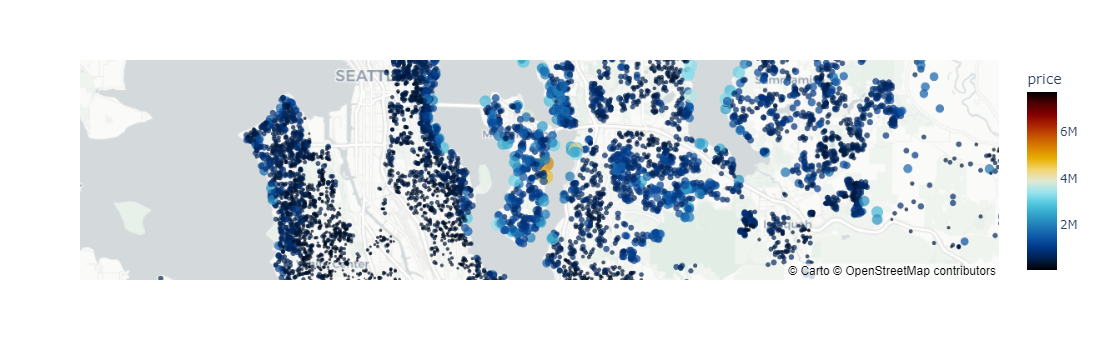

In [367]:
import plotly.express as px

# Create a scatter plot on a map
fig = px.scatter_mapbox(trans_df, lat="lat", lon="long", size="price", 
                        color="price", color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=10, mapbox_style="carto-positron")

fig.show()

We can see that indeed, some locations do have houses that are far more expensive. This is a potentially good predictor of price.

<h2>Visualising zipcode as a predictor</h2>

We can compute the average price for each zip code and visualize it as a bar plot. This allows us to compare the average house prices across different zip codes.

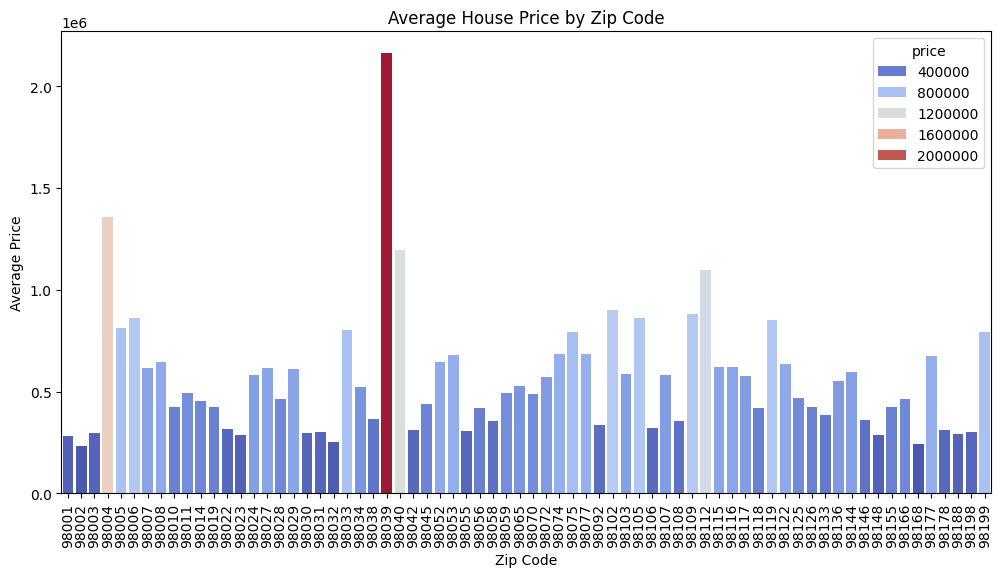

In [371]:
# Group data by zip code and calculate mean price
zipcode_price = trans_df.groupby('zipcode')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=zipcode_price, x='zipcode', y='price', hue='price', palette='coolwarm', legend=True)

# Add labels and title
plt.xticks(rotation=90)
plt.title('Average House Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average Price')

plt.show()

We can see that prices are higher for certain zipcodes. The only task remaining would be to figure out how to turn these zipcodes into a feature that a predictive model can understand. We have two options:
 - One-hot encoding
 - Target encoding

Now, let's move to linear visualisations

<p>In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. </p>

<h3>Positive Linear Relationship</h4>


Let's find the scatterplot of "Sqft living" and "price".

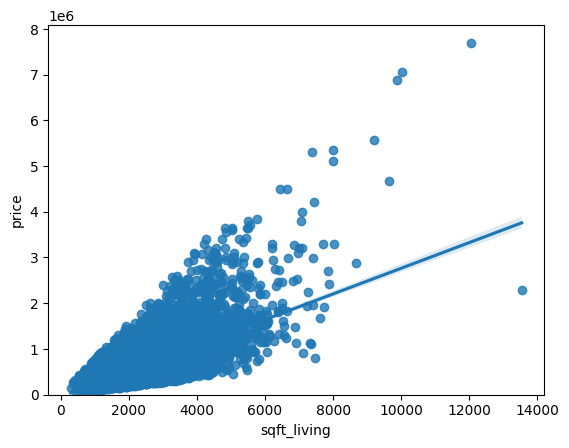

In [536]:
sns.regplot(x="sqft_living", y="price", data=trans_df)
plt.ylim(0,)
plt.show()

Beautiful.

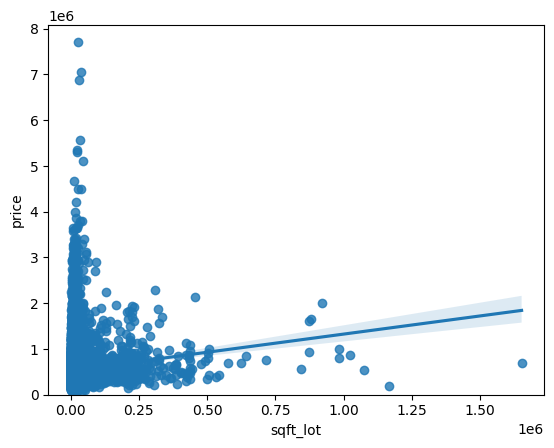

In [534]:
sns.regplot(x="sqft_lot", y="price", data=trans_df)
plt.ylim(0,)
plt.show()

## Value counts


Checking for value counts is important when determining predictors of price (or any other target variable) because it helps us understand the distribution of features. Features with balanced categories might have a stronger predictive power compared to features with highly imbalanced categories.

In [381]:
trans_df['sqft_living15'].value_counts().to_frame()

,count
sqft_living15,
1540,197
1440,195
1560,192
1500,181
1460,169
...,...
2054,1
3736,1
4950,1


In [382]:
trans_df['sqft_above'].value_counts().to_frame()

,count
sqft_above,
1300,212
1010,210
1200,206
1220,192
1140,184
...,...
3674,1
2979,1
2382,1


In [383]:
trans_df['grade'].value_counts().to_frame()

,count
grade,
7,8981
8,6068
9,2615
6,2038
10,1134
11,399
5,242
12,90
4,29


In [384]:

trans_df['bathrooms'].value_counts().to_frame()

,count
bathrooms,
2,10552
1,8355
3,2228
4,338
0,76
5,48
6,12
8,2
7,2


In [385]:

trans_df['condition'].value_counts().to_frame()

,count
condition,
3,14031
4,5679
5,1701
2,172
1,30


None of the categories look biased so there is nothing to worry about. 

<h2> Waterfront as a predictor </h2>


We want to determine whether houses with or without a view have more price outliers

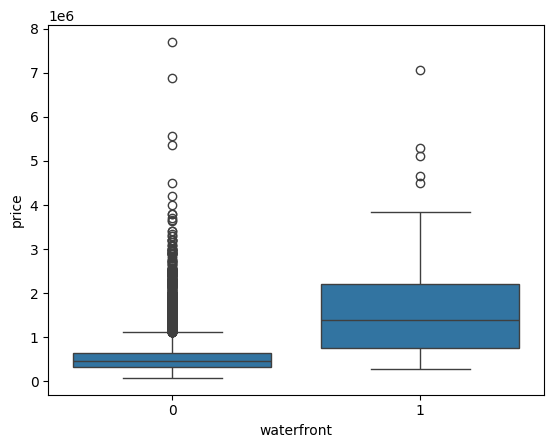

In [542]:
sns.boxplot(x="waterfront", y="price", data=trans_df)
plt.show()

In [390]:
#checking for value count
trans_df['waterfront'].value_counts().to_frame()

,count
waterfront,
0,21450
1,163


Here, we have a strong imbalance between the values: 0 appears 21,450 times, while 1 appears only 163 times.

This imbalance may suggest that the presence of a waterfront (1) is rare. While rare categories can still be meaningful predictors, the small number of instances for 1 could affect the model's ability to generalise.

To determine if waterfront is a good predictor, we can check whether the presence of a waterfront (1) *significantly* impacts the price. We can do this by looking at the average price for each value of waterfront.

For example, if properties with a waterfront (1) consistently have a much higher price than those without (0), it might still be a valuable predictor despite its rarity.

In [393]:
trans_df.groupby('waterfront')['price'].mean()


waterfront
0    5.315636e+05
1    1.661876e+06
Name: price, dtype: float64


The output shows a significant difference in the mean price between properties without a waterfront (0) and those with a waterfront (1):

- No Waterfront (0): Average price = $531,563
  
- With Waterfront (1): Average price = $1,661,876

This large gap in average prices suggests that waterfront is indeed a strong predictor of price. Even though the number of properties with a waterfront is much smaller (163 vs. 21,450), the presence of a waterfront leads to significantly higher property values.

Handling the Imbalance:

If using models sensitive to imbalance (e.g., linear regression), we might want to consider upsampling the minority class (1) to ensure the model learns the effect of a waterfront properly.
If using tree-based models (e.g., decision trees, random forests, or gradient boosting), the imbalance is less of a concern since these models can handle categorical splits well.

<h1>Multiple interactions with price</h1>


So far, we have only been comparing price with individual variables. It is also useful to group multiple variables together and assess whether they work strongly together to determine price. 

Let's create a line plot to visualise how the relationship between sqft_living and price differs depending on whether waterfront is 0 or 1.

Let's do the same to visualise how sqft_above and price differs depending on whether waterfront is 0 or 1.

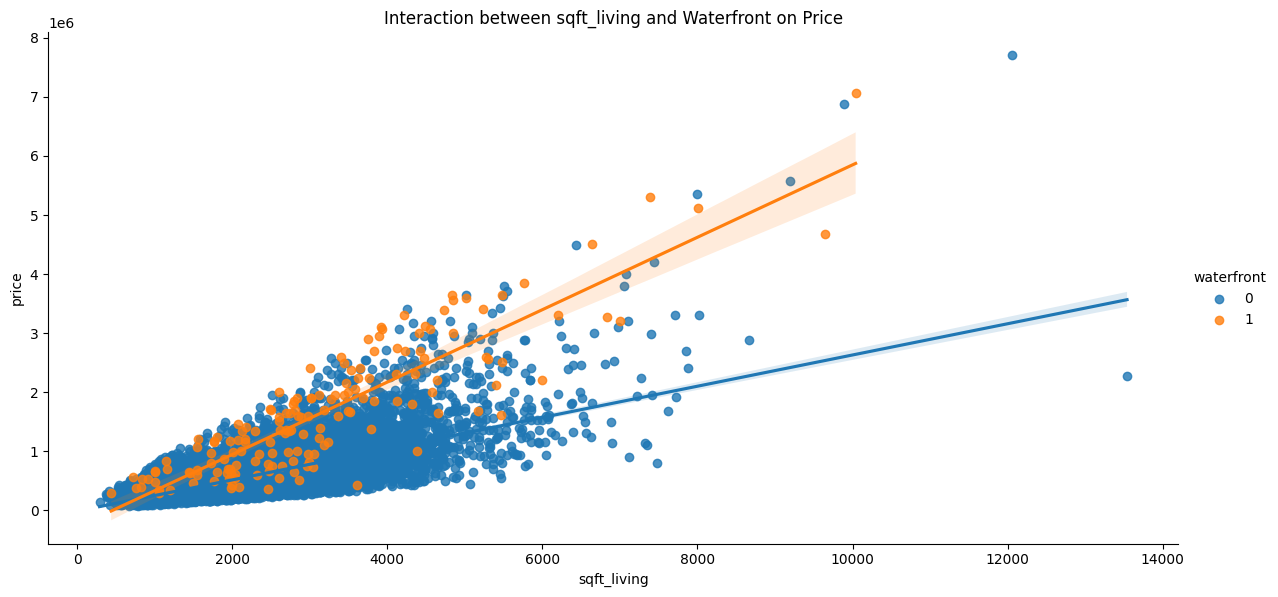

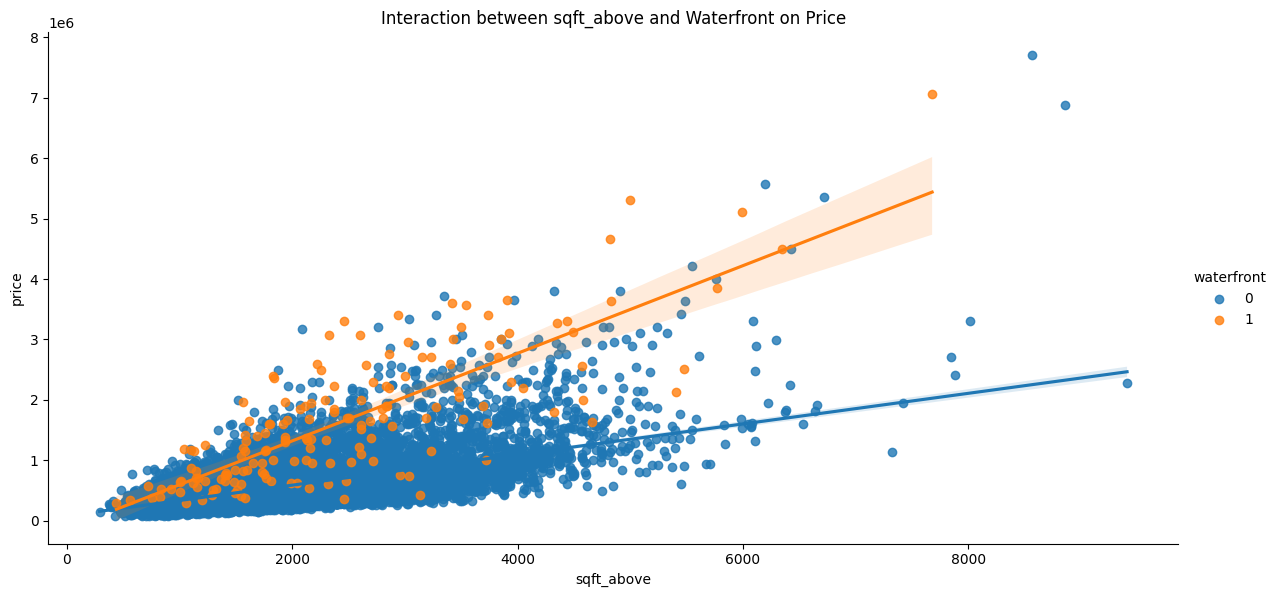

In [548]:
# Scatter plot for sqft_living vs price colored by waterfront
sns.lmplot(x='sqft_living', y='price', hue='waterfront', data=trans_df, aspect=2, height=6)
plt.title('Interaction between sqft_living and Waterfront on Price')
plt.show()

# Scatter plot for sqft_above vs price colored by waterfront
sns.lmplot(x='sqft_above', y='price', hue='waterfront', data=trans_df, aspect=2, height=6)
plt.title('Interaction between sqft_above and Waterfront on Price')
plt.show()


Interpretation of the Plots:

First Plot: Interaction between sqft_living and waterfront on price:

 - The orange line (representing waterfront = 1) has a much steeper slope than the blue line (waterfront = 0), indicating that as sqft_living     increases, the price for waterfront properties rises significantly more than for non-waterfront properties.
 - This suggests a strong interaction between waterfront and sqft_living: the effect of sqft_living on price is much more pronounced for properties with waterfront.

Second Plot: Interaction between sqft_above and waterfront on price:

 - Similar to the first plot, the orange line shows a steeper slope, indicating that properties with a waterfront see a much greater increase in price  as sqft_above increases, compared to non-waterfront properties.
 - This further supports the idea that the presence of a waterfront amplifies the effect of living space (sqft_above and sqft_living) on property prices.

Conclusion:

Waterfront as a Modifier: Both plots indicate that waterfront acts as a significant modifier of the relationship between sqft_living/sqft_above and price. Waterfront properties not only have a higher base price but also see a larger price increase with additional living space.

Including Interaction Terms: These visualisations strongly suggest that including interaction terms between waterfront and other variables like sqft_living or sqft_above in the predictive models would likely improve the model's accuracy.

<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the house price. We have narrowed it down to the following variables:</p>

Numerical variables:
<ul>
    <li>sqft_living</li>
    <li>grade</li>
    <li>sqft_above</li>
    <li>sqft_living15</li>
    <li>waterfront</li>
</ul>
    
Categorical variables:
<ul>
    <li>zipcode</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

# Model Development


<h3>Target Encoding</h3>

 - Target encoding replaces each zip code with the mean house price in that zip code, which can sometimes lead to better performance in models compared to one-hot encoding.

In [405]:
# Target encoding: replace zip code with the average price per zip code
trans_df['zipcode_encoded'] = trans_df.groupby('zipcode')['price'].transform('mean')

# Use 'zipcode_encoded' for modeling instead of 'zipcode'

In [406]:
trans_df.head() #checking for zipcode_encoded column

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zipcode_encoded
0,2014-10-13,221900.0,3,1,1180,5650,1,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,310612.755725
1,2014-12-09,538000.0,3,2,2570,7242,2,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,469455.770732
2,2015-02-25,180000.0,2,1,770,10000,1,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,462480.035336
3,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,551688.673004
4,2015-02-18,510000.0,3,2,1680,8080,1,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,685605.775510


<h2>Create the model</h2>

In [408]:
#create the linear regression model
lm = LinearRegression()
lm

LinearRegression()

In [409]:
Z = trans_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15','waterfront', 'zipcode_encoded']]

In [410]:
lm.fit(Z, trans_df['price']) #Fit the linear model using the six above-mentioned variables.

LinearRegression()

In [411]:
lm.intercept_

-599402.3475542614

In [412]:
lm.coef_

array([ 1.91256913e+02,  5.71132757e+04, -1.70327996e+01, -2.64292772e+01,
        8.52138227e+05,  7.05299700e-01])

What is our linear function?

<b>Price</b> = -599402.3475542614 + 1.91256913e+02 x <b>sqft_living</b> + 5.71132757e+04 x <b>grade</b> + -1.70327996e+01 x <b>sqft_above</b> + -2.64292772e+01 x <b>sqft_living15</b> + 8.52138227e+05 x <b>waterfront</b> + 7.05299700e-01 x <b>zipcode_encoded</b>

<h2>Model Evaluation Using Visualisation</h2>

<p>For multiple linear regression, a <b>distribution plot</b> is recommended. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

In [417]:
Y_hat = lm.predict(Z)

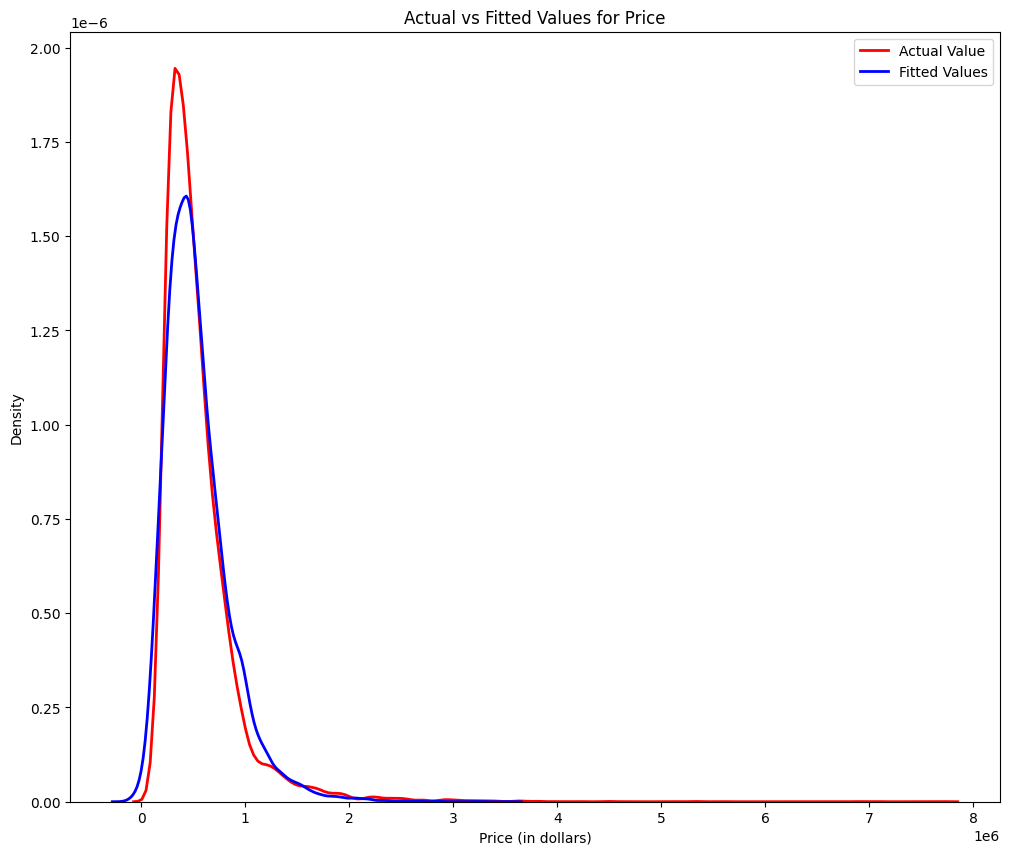

In [418]:

# Set the figure size
width = 12
height = 10
plt.figure(figsize=(width, height))

# Plot the actual values using kdeplot
ax1 = sns.kdeplot(trans_df['price'], color="r", label="Actual Value", linewidth=2)

# Plot the fitted values using kdeplot
sns.kdeplot(Y_hat, color="b", label="Fitted Values", ax=ax1, linewidth=2)

# Add title and labels
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

# Show legend and plot
plt.legend()
plt.show()

- The lines are fairly close, indicating that the model is capturing the general distribution of the house prices well. This is a positive sign that our model is somewhat accurate in predicting prices.
- The peak of the actual values (red line) occurs slightly to the left of the peak of the fitted values (blue line). This slight shift suggests that the model may be slightly overestimating prices for the most common price range. The blue line peaks at a lower density than the red line, meaning the model is spreading the predictions more broadly around the central values.
- The model’s tails are not perfectly aligned, particularly for very high prices, where the model may be underpredicting.

<h2>Quantitative Evaluation</h2>

<p>When evaluating our models, not only do we want to visualise, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).</p>


Let's begin by calculating the R^2:

In [423]:
# fit the model 
lm.fit(Z, trans_df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, trans_df['price']))

The R-square is:  0.746623611124587


Next, let's calculate the MSE:

In [425]:
#we produce a prediction
Y_predict_multifit = lm.predict(Z)

In [426]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(trans_df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  34149092223.67464


<h3>What These Metrics Suggest About Our Model</h3>

Strengths:

Our model explains a substantial portion of the variance in house prices, which is a strong indication that our chosen predictors (sqft_living, grade, zip code, sqft_above, waterfront etc.) are relevant and useful.
The reasonably high R^2 is a good indicator of the model’s overall quality.

Areas for Improvement:

The MSE suggests that there is still a notable amount of prediction error. This could be due to:

- Missing relevant features that affect house prices.
- Non-linear relationships that are not captured well by a linear model.
- Potential overfitting or underfitting issues.

Let us quickly try a <b>polynomial</b> multi-variate fit.

In [429]:
# Features (Z) and target (y)
Z = trans_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'waterfront', 'zipcode_encoded']]
y = trans_df['price']  # Make sure y is a Series, not a list

In [430]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
Z_poly = poly.fit_transform(Z)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(Z_poly, y)

# Predict using the model
y_pred = model.predict(Z_poly)

<h2>Quant Evaluation of polynomial multi-variate linear regression</h2>

Let's calculate the R^2 and MSE

In [433]:
# Calculate R²
r2 = r2_score(y, y_pred)

# Calculate MSE
mse = mean_squared_error(y, y_pred)

print(f'R²: {r2}')
print(f'MSE: {mse}')

R²: 0.8281125412567754
MSE: 23166328586.369083


<h2>Decision Making</h2>

<p>Now that we have visualised the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h3>Model Performance (R² and MSE)</h3>

<h3>Polynomial Fit:</h3>
 - R²: 0.828: This indicates that 82.8% of the variance in the target variable is explained by the model.
 - MSE: 23,166,328,586.37: This represents the average squared difference between the actual and predicted prices.
     
<h3>Multi-linear Fit:</h3>
 - R²: 0.747: This indicates that 74.7% of the variance in the target variable is explained by the model.
 - MSE: 34,149,092,223.67: This represents the average squared difference between the actual and predicted prices.

<h3>Conlusively:</h3>

The polynomial fit has a higher R^2 and a lower MSE compared to the multi-linear fit, suggesting that the polynomial model explains more of the variance in the target variable and has smaller errors in predictions.

# Model Refinement


We will split the data into training and testing sets:


In [441]:
features =['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'waterfront', 'zipcode_encoded']    
X = trans_df[features]
Y = trans_df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


<h2>Model training on the training data</h2>

In [443]:
# Choose the degree of the polynomial
degree = 2  # You can change this value to try different degrees

# Transform features to polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train)  # Transform the training features

# Train the linear regression model using the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the training set to evaluate performance
y_train_pred = model.predict(X_train_poly)

# Evaluate the model performance using metrics like RMSE and R-squared
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R2): {r2_train}")

Training Mean Squared Error (MSE): 22690338184.86254
Training R-squared (R2): 0.828933090095079


Let's also calculate the <b>Root Mean Squared Error<b/>

RMSE (Root Mean Squared Error) represents the average error in predictions in terms of the original units of the target variable, which in this case is housing price.

In [446]:
rmse_train = mse_train ** 0.5
print(f"Training RMSE: {rmse_train}")


Training RMSE: 150633.1244609317


<b>Interpretation:</b> 

 - Given that house prices vary widely, from $75,000  to $7.7 million, an RMSE of $150,633 might indicate that your model is performing reasonably well, but there is noticeable prediction error, particularly for lower-priced homes.

 - The fact that the model captures 83% of the variance suggests it's doing well at explaining the relationship between features like sqft_living, grade, and zipcode_encoded with housing prices, though there’s still room for improvement (17% of the variance remains unexplained).

<h2>Model training on the Test data</h2>

In [451]:
# Transform the test set features to polynomial features using the same degree
X_test_poly = poly.transform(x_test)  # Use the same poly object from training

# Make predictions on the test set
y_test_pred = model.predict(X_test_poly)

# Evaluate the model performance on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = mse_test ** 0.5

# Print the evaluation metrics for the test set
print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")
print(f"Test R-squared (R2): {r2_test}")

Test Mean Squared Error (MSE): 27036016404.219357
Test Root Mean Squared Error (RMSE): 164426.32515573458
Test R-squared (R2): 0.8158907013854128


<b>Interpretation:</b>

 - The model is performing fairly well on both the training and test sets. The small increase in RMSE and decrease in R² on the test set suggests that the model is generalising well, though there’s a slight loss in predictive accuracy.

 - RMSE of $164,426 is somewhat large relative to lower-priced homes but is more reasonable for higher-priced properties. We may want to experiment with additional features, experiement with polynomial degrees, or apply regularisation if we're aiming for more precise predictions, particularly for less expensive homes.

<b>Experimenting with polynomial degrees</b>

In [455]:
# Define a function to experiment with different polynomial degrees

def evaluate_polynomial_regression(degree):
    # Step 1: Transform the features using the specified polynomial degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(x_train)
    X_test_poly = poly.transform(x_test)
    
    # Step 2: Train the linear regression model on the transformed training set
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Step 3: Make predictions on the training set and evaluate
    y_train_pred = model.predict(X_train_poly)
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mse_train ** 0.5
    
    # Step 4: Make predictions on the test set and evaluate
    y_test_pred = model.predict(X_test_poly)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mse_test ** 0.5
    
    # Step 5: Print the results
    print(f"Degree: {degree}")
    print(f"Training RMSE: {rmse_train}, R-squared: {r2_train}")
    print(f"Test RMSE: {rmse_test}, R-squared: {r2_test}")
    print("="*50)

In [456]:
# Test different polynomial degrees (1 is linear, 2 is what we've been using, etc.)
for degree in [1, 2, 3, 4]:
    evaluate_polynomial_regression(degree)

Degree: 1
Training RMSE: 182730.43015690974, R-squared: 0.7482631492470491
Test RMSE: 196340.18917877375, R-squared: 0.7374866268498312
Degree: 2
Training RMSE: 150633.1244609317, R-squared: 0.828933090095079
Test RMSE: 164426.32515573458, R-squared: 0.8158907013854128
Degree: 3
Training RMSE: 148871.0503506371, R-squared: 0.8329118899403521
Test RMSE: 200046.9202703122, R-squared: 0.7274810155842479
Degree: 4
Training RMSE: 146879.7226998711, R-squared: 0.8373519991722298
Test RMSE: 279020.3348388448, R-squared: 0.4698427152115807


Analysis:

Degree 1 (Linear Regression):

- Training RMSE: 182,730
- Test RMSE: 196,340
- The model captures only 74.8% of the variance in training data, indicating underfitting. The model's performance is lower than higher degrees, confirming that linear regression is too simplistic for this data.

Degree 2 (Current Model):

- Training RMSE: 150,633
- Test RMSE: 164,426
- This is the best balance so far. It achieves a high R² (82.9% for training and 81.6% for test), suggesting the model captures much of the relationship without overfitting significantly.

Degree 3:

- Training RMSE: 148,871
- Test RMSE: 200,046
- While the training RMSE improves slightly, the test RMSE worsens significantly. The R² drops to 72.7%, indicating potential overfitting as the model starts to capture noise in the training data rather than the true signal.

Degree 4:

- Training RMSE: 146,879
- Test RMSE: 279,020
- This degree performs the worst on the test set, with a drastic drop in R² (46.9%). The model is overfitting badly here, capturing more noise and resulting in poor predictions on unseen data.


Conclusion:
- Best Model: Degree 2 seems to be the best choice as it strikes a good balance between bias and variance, performing well on both the training and test sets.
- Overfitting: Degrees 3 and 4 show signs of overfitting, where the model performs well on training data but poorly on test data.